# Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from keras.utils.np_utils import to_categorical
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, Concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

# Dataset processing

In [3]:
df = pd.read_csv("datasets/df_ptrc_ML.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3140 non-null   object 
 1   Sequence           3140 non-null   object 
 2   Fluorescence       3140 non-null   float64
 3   Expression scaled  3140 non-null   float64
 4   Strength           3140 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 122.8+ KB


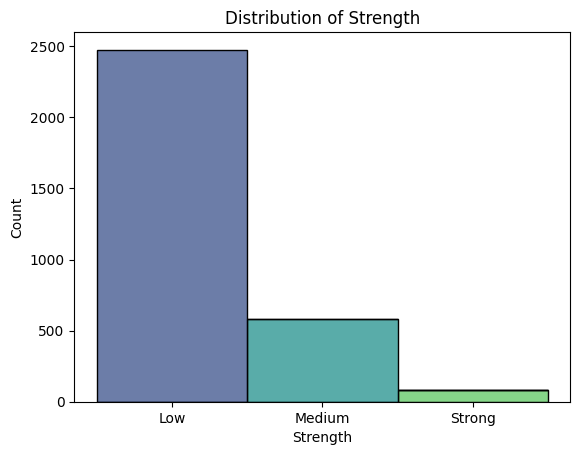

In [5]:
df['Strength'] = df['Strength'].astype('category')

sns.histplot(data=df, x='Strength', hue='Strength', multiple='stack', palette='viridis', legend=None)

plt.xticks(ticks=[0, 1, 2], labels=["Low", "Medium", "Strong"])
plt.title("Distribution of Strength")
plt.xlabel('Strength')
plt.ylabel('Count')
plt.show()

In [41]:
df_train, df_test, y_train, y_test = train_test_split(df, df["Strength"], test_size=0.1, stratify=df["Strength"], random_state=42)

# ML models

In [42]:
df_train_ML = df_train[['Promoter sequence', "Strength"]]
df_test_ML = df_test[['Promoter sequence', "Strength"]]

In [43]:
def get_sequence_in_columns(df):
    return pd.concat([df, df['Promoter sequence'].str.upper().apply(lambda x: pd.Series(list(x))).add_prefix('pos_')], axis=1)

In [44]:
df_train_ML = get_sequence_in_columns(df_train_ML)
df_test_ML = get_sequence_in_columns(df_test_ML)

In [45]:
X_ML_train = df_train_ML.drop(columns=['Promoter sequence', "Strength"])

X_ML_test = df_test_ML.drop(columns=['Promoter sequence', "Strength"])


y_ML_train = df_train["Strength"]
y_ML_test = df_test["Strength"]

In [46]:
encoder = OneHotEncoder(sparse_output=False)
encoded_X_ML_train = encoder.fit_transform(X_ML_train)
encoded_column_names = encoder.get_feature_names_out()
encoded_X_ML_test = encoder.transform(X_ML_test)

In [47]:
X_ML_train = pd.DataFrame(encoded_X_ML_train, columns=encoded_column_names)
X_ML_test = pd.DataFrame(encoded_X_ML_test, columns=encoded_column_names)

In [48]:
KNN_model = KNeighborsClassifier()
Logit_model = LogisticRegression()
DecTree_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
GB_model = GradientBoostingClassifier()
XGB_model = XGBClassifier()

In [49]:
def run_model(model, X_train, y_train, X_test, y_test):
    L=[]
    model.fit(X_train, y_train)
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    accuracy_train = accuracy_score(y_train,y_hat_train)
    accuracy_test = accuracy_score(y_test,y_hat_test)
    L.append(accuracy_train)
    L.append(accuracy_test)
    return L

In [50]:
list_of_models = [KNN_model, Logit_model, DecTree_model, RF_model, GB_model, XGB_model]

In [51]:
L=[]
for elem in list_of_models:
    try:
        L.append(run_model(elem, X_ML_train, y_ML_train, X_ML_test, y_ML_test))
    except:
        None
L

c:\Users\Sergio\miniconda3\envs\python3_10_9\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[0.8687190375088464, 0.7834394904458599],
 [0.8719037508846426, 0.8471337579617835],
 [1.0, 0.7738853503184714],
 [1.0, 0.8248407643312102],
 [0.8715498938428875, 0.8280254777070064],
 [0.9253361641896674, 0.8312101910828026]]

In [52]:
RF_model

RandomForestClassifier()

In [53]:
model_RF = RandomForestClassifier()
params = {'criterion': ['entropy', 'gini'], 
          'max_depth': [5, 7], 
          'max_features': [0.3, 0.7], 
          'max_samples': [0.8, 0.5], 
          'max_leaf_nodes': [10, 30], 
          'min_impurity_decrease': [0.05], 
          'min_samples_split': [5, 10], 
          'n_estimators': [100] }

scoring = ['accuracy']

grid_solver = GridSearchCV(estimator = model_RF, 
                           param_grid = params,
                           scoring = scoring,
                           cv = 5,
                           refit = 'accuracy',
                           verbose = 1)

model_result_RF = grid_solver.fit(X_ML_train, y_ML_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


In [54]:
features_importances = model_result_RF.best_estimator_.feature_importances_
features_importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [55]:
features_names = model_result_RF.best_estimator_.feature_names_in_
features_names

array(['pos_0_A', 'pos_0_C', 'pos_0_G', 'pos_0_T', 'pos_1_A', 'pos_1_C',
       'pos_1_G', 'pos_1_T', 'pos_2_A', 'pos_2_C', 'pos_2_G', 'pos_2_T',
       'pos_3_A', 'pos_3_C', 'pos_3_G', 'pos_3_T', 'pos_4_A', 'pos_4_C',
       'pos_4_G', 'pos_4_T', 'pos_5_A', 'pos_5_C', 'pos_5_G', 'pos_5_T',
       'pos_6_A', 'pos_6_C', 'pos_6_G', 'pos_6_T', 'pos_7_A', 'pos_7_C',
       'pos_7_G', 'pos_7_T', 'pos_8_A', 'pos_8_C', 'pos_8_G', 'pos_8_T',
       'pos_9_A', 'pos_9_C', 'pos_9_G', 'pos_9_T', 'pos_10_A', 'pos_10_C',
       'pos_10_G', 'pos_10_T', 'pos_11_A', 'pos_11_C', 'pos_11_G',
       'pos_11_T', 'pos_12_A', 'pos_12_C', 'pos_12_G', 'pos_12_T',
       'pos_13_A', 'pos_13_C', 'pos_13_G', 'pos_13_T', 'pos_14_A',
       'pos_14_C', 'pos_14_G', 'pos_14_T', 'pos_15_A', 'pos_15_C',
       'pos_15_G', 'pos_15_T', 'pos_16_A', 'pos_16_C', 'pos_16_G',
       'pos_16_T', 'pos_17_A', 'pos_17_C', 'pos_17_G', 'pos_17_T',
       'pos_18_A', 'pos_18_C', 'pos_18_G', 'pos_18_T', 'pos_19_A',
       'pos_19_C',

In [56]:
print("Train")
y_pred_train=model_result_RF.predict(X_ML_train)
print("Accuracy:", accuracy_score(y_ML_train,y_pred_train))
probs_train=model_result_RF.predict_proba(X_ML_train)

print("Test")
y_pred_test=model_result_RF.predict(X_ML_test)
print("Accuracy:", accuracy_score(y_ML_test,y_pred_test))
probs=model_result_RF.predict_proba(X_ML_test)

Train
Accuracy: 0.7880396319886765
Test
Accuracy: 0.7898089171974523


# Neural Networks

## Multilayer perceptron

In [57]:
model = Sequential()

# First layer
model.add(Dense(50, activation='relu', input_shape=(X_ML_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Second layer
model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

history = model.fit(X_ML_train, y_ML_train, epochs=200, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                14850     
                                                                 
 batch_normalization_2 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_3 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 50)               

In [58]:
loss_train, accuracy_train = history.model.evaluate(X_ML_train, y_ML_train)
print(f'----TRAIN----\nLoss: {loss_train}, Accuracy: {accuracy_train}')

loss_test, accuracy_test = history.model.evaluate(X_ML_test, y_ML_test)
print(f'----TEST----\nLoss: {loss_test}, Accuracy: {accuracy_test}')

89/89 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.0255
----TRAIN----
Loss: 0.2412126064300537, Accuracy: 0.025477707386016846
10/10 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.0255
----TEST----
Loss: 0.24062277376651764, Accuracy: 0.025477707386016846


89/89 [==============================] - 0s 3ms/step


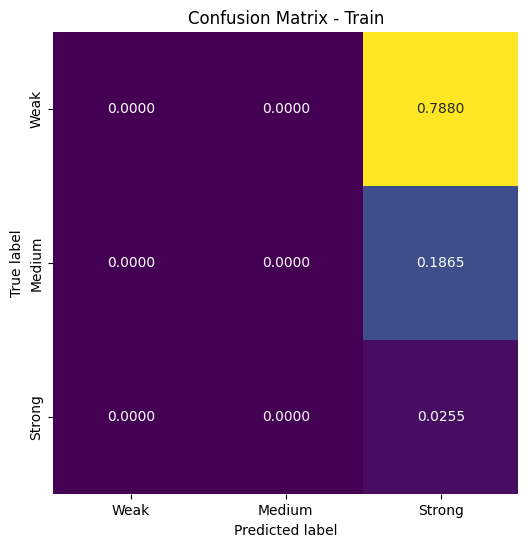

In [59]:
y_pred_train= history.model.predict(X_ML_train)
y_pred_train = np.argmax(y_pred_train, axis=1)
cfm = confusion_matrix(y_ML_train, y_pred_train, normalize="all")

cfm_df = pd.DataFrame(cfm, index=["Weak", "Medium", "Strong"], columns=["Weak", "Medium", "Strong"])

plt.figure(figsize=(6, 6))
sns.heatmap(cfm_df, annot=True, cmap='viridis', fmt='.4f', cbar=False, linewidths=0, linecolor=None)
plt.title("Confusion Matrix - Train")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

10/10 [==============================] - 0s 1ms/step


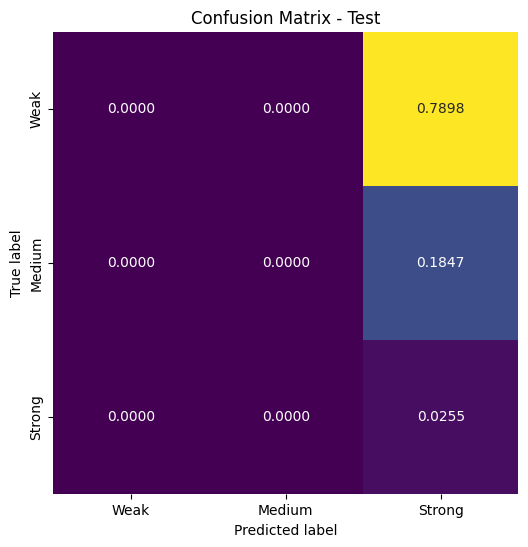

In [60]:
y_pred_test= history.model.predict(X_ML_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
cfm = confusion_matrix(y_ML_test, y_pred_test, normalize="all")

cfm_df = pd.DataFrame(cfm, index=["Weak", "Medium", "Strong"], columns=["Weak", "Medium", "Strong"])

plt.figure(figsize=(6, 6))
sns.heatmap(cfm_df, annot=True, cmap='viridis', fmt='.4f', cbar=False, linewidths=0, linecolor=None)
plt.title("Confusion Matrix - Test")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## Convulational Neural Network Models

In [61]:
def one_hot_encode_dna(sequences):
    # dictionary for coding
    mapping = {
        'A': [1, 0, 0, 0],
        'C': [0, 1, 0, 0],
        'G': [0, 0, 1, 0],
        'T': [0, 0, 0, 1],
        'N': [0, 0, 0, 0] 
    }
    
    # obtain length of sequences and number of sequences
    seq_length = len(sequences[0])
    num_sequences = len(sequences)
    
    # empty matrix for encoded sequences
    one_hot_encoded = np.zeros((num_sequences, seq_length, 4), dtype=np.int8)
    
    # fill matrix with encoded values
    for i, seq in enumerate(sequences):
        for j, nucleotide in enumerate(seq):
            one_hot_encoded[i, j, :] = mapping.get(nucleotide, [0, 0, 0, 0])
    
    return one_hot_encoded

In [62]:
X_cnn_train = list(df_train["Promoter sequence"].str.upper())
X_cnn_train = one_hot_encode_dna(X_cnn_train)

X_cnn_test = list(df_test["Promoter sequence"].str.upper())
X_cnn_test = one_hot_encode_dna(X_cnn_test)

In [63]:
y_cnn_train = df_train["Strength"]
y_cnn_test = df_test["Strength"]

In [64]:
y_cnn_train = np.array(y_cnn_train).astype(np.float32).reshape(-1, 1)
y_cnn_test = np.array(y_cnn_test).astype(np.float32).reshape(-1, 1)
y_cnn_train = to_categorical(y_cnn_train)
y_cnn_test = to_categorical(y_cnn_test)

### Inception model

In [65]:
X_cnn_train.shape

(2826, 74, 4)

In [66]:
# input of the model
inputs = Input(shape=(X_cnn_train.shape[1], X_cnn_train.shape[2]))

# tower 1 for transcription factor detection
tower_1 = Conv1D(filters=40, kernel_size=18, activation='relu', padding='same')(inputs)
tower_1 = BatchNormalization()(tower_1)
tower_1 = MaxPooling1D(pool_size=2, strides=2)(tower_1)
tower_1 = Dropout(0.7)(tower_1)

# tower 2 for boxes -35 and -10 detection
tower_2 = Conv1D(filters=40, kernel_size=6, activation='relu', padding='same')(inputs)
tower_2 = BatchNormalization()(tower_2)
tower_2 = MaxPooling1D(pool_size=2, strides=2)(tower_2)
tower_2 = Dropout(0.7)(tower_2)

# concatenate towers
together = Concatenate(axis=-1)([tower_1, tower_2])

x = MaxPooling1D(pool_size=2, strides=2)(together)
x = Dropout(0.7)(x)
x = Flatten()(x)

# multilayer
x = Dense(70, activation='relu')(x)

# output layer
x = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
model.summary()
history = model.fit(X_cnn_train, y_cnn_train, epochs=200, batch_size=32, validation_split=0.10)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 74, 4)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 74, 40)       2920        ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 74, 40)       1000        ['input_1[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 40)      160         ['conv1d[0][0]']                 
 rmalization)                                                                                 

In [67]:
loss_train, accuracy_train = history.model.evaluate(X_cnn_train, y_cnn_train)
loss_test, accuracy_test = history.model.evaluate(X_cnn_test, y_cnn_test)
print('----TRAIN----')
print(f'Loss: {loss_train}, Accuracy: {accuracy_train}')
print('----TEST----')
print(f'Loss: {loss_test}, Accuracy: {accuracy_test}')

----TRAIN----


89/89 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8397
Loss: 0.3596591055393219, Accuracy: 0.8397027850151062
----TEST----
10/10 [==============================] - 0s 3ms/step - loss: 0.4402 - accuracy: 0.8153
Loss: 0.4401761293411255, Accuracy: 0.8152866363525391


89/89 [==============================] - 0s 3ms/step


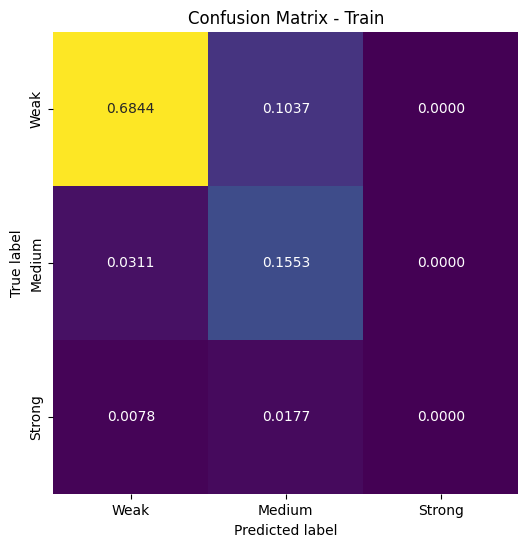

In [68]:
y_pred_train= history.model.predict(X_cnn_train)
y_pred_train = np.argmax(y_pred_train, axis=1)
y_cnn_train_cfm = np.argmax(y_cnn_train, axis=1)
cfm = confusion_matrix(y_cnn_train_cfm, y_pred_train, normalize="all")
cfm_df = pd.DataFrame(cfm, index=["Weak", "Medium", "Strong"], columns=["Weak", "Medium", "Strong"])

plt.figure(figsize=(6, 6))

sns.heatmap(cfm_df, annot=True, cmap='viridis', fmt='.4f', cbar=False, linewidths=0, linecolor=None)

plt.title("Confusion Matrix - Train")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

10/10 [==============================] - 0s 2ms/step


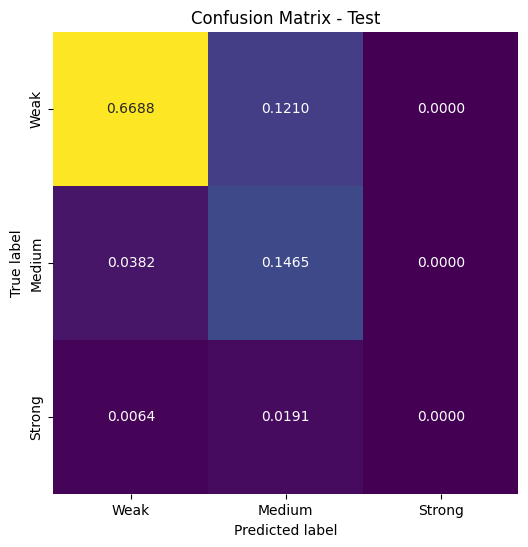

In [69]:
y_pred_test= history.model.predict(X_cnn_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
y_cnn_test_cfm = np.argmax(y_cnn_test, axis=1)
cfm = confusion_matrix(y_cnn_test_cfm, y_pred_test, normalize="all")

cfm_df = pd.DataFrame(cfm, index=["Weak", "Medium", "Strong"], columns=["Weak", "Medium", "Strong"])

plt.figure(figsize=(6, 6))
sns.heatmap(cfm_df, annot=True, cmap='viridis', fmt='.4f', cbar=False, linewidths=0, linecolor=None)
plt.title("Confusion Matrix - Test")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

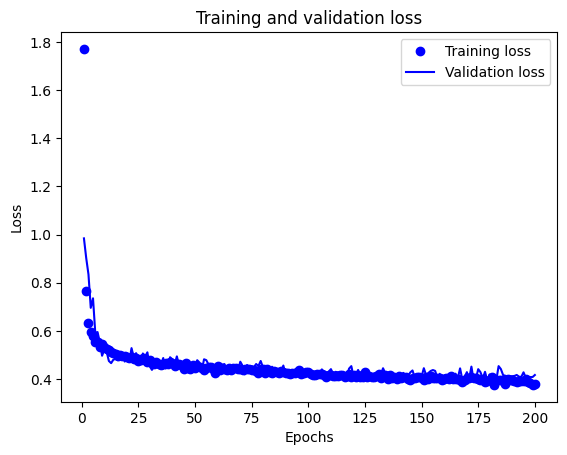

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

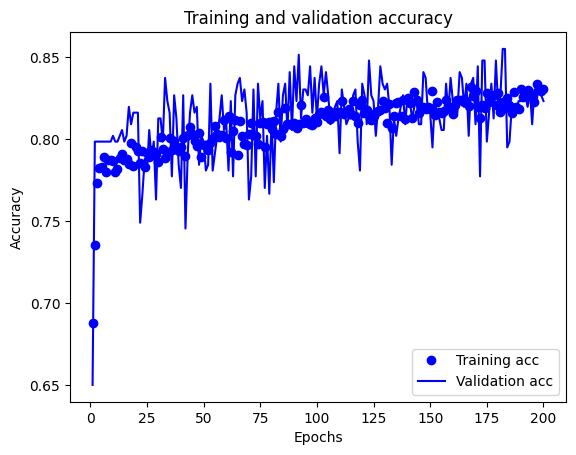

In [71]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Inception regularizers

In [72]:
inputs = Input(shape=(X_cnn_train.shape[1], X_cnn_train.shape[2]))

# first tower for transcription factors
tower_1 = Conv1D(filters=30, kernel_size=18, kernel_regularizer=regularizers.l1(0.001), activation='relu', padding='same')(inputs)
tower_1 = MaxPooling1D(pool_size=2)(tower_1)
tower_1 = Dropout(0.7)(tower_1)

# second tower for -35 and -10 boxes
tower_2 = Conv1D(filters=30, kernel_size=6, kernel_regularizer=regularizers.l1(0.001), activation='relu', padding='same')(inputs)
tower_2 = MaxPooling1D(pool_size=2)(tower_2)
tower_2 = Dropout(0.7)(tower_2)

# third tower for whole promoters
tower_3 = Conv1D(filters=20, kernel_size=30, kernel_regularizer=regularizers.l1(0.001), activation='relu', padding='same')(inputs)
tower_3 = MaxPooling1D(pool_size=2)(tower_3)
tower_3 = Dropout(0.4)(tower_3)

# concatenate towers
together = Concatenate(axis=-1)([tower_1, tower_2, tower_3])

# aditional layers
x = MaxPooling1D(pool_size=5)(together)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(10, activation='relu')(x)
x = Dense(3, activation='softmax')(x) 

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_cnn_train, y_cnn_train, epochs=100, batch_size=32, validation_split=0.3)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 74, 4)]      0           []                               
                                                                                                  
 conv1d_2 (Conv1D)              (None, 74, 30)       2190        ['input_2[0][0]']                
                                                                                                  
 conv1d_3 (Conv1D)              (None, 74, 30)       750         ['input_2[0][0]']                
                                                                                                  
 conv1d_4 (Conv1D)              (None, 74, 20)       2420        ['input_2[0][0]']                
                                                                                            

In [73]:
loss_train, accuracy_train = history.model.evaluate(X_cnn_train, y_cnn_train)
loss_test, accuracy_test = history.model.evaluate(X_cnn_test, y_cnn_test)
print('----TRAIN----')
print(f'Loss: {loss_train}, Accuracy: {accuracy_train}')
print('----TEST----')
print(f'Loss: {loss_test}, Accuracy: {accuracy_test}')

10/10 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.7962
----TRAIN----
Loss: 0.4367554783821106, Accuracy: 0.8499646186828613
----TEST----
Loss: 0.48621612787246704, Accuracy: 0.7961783409118652


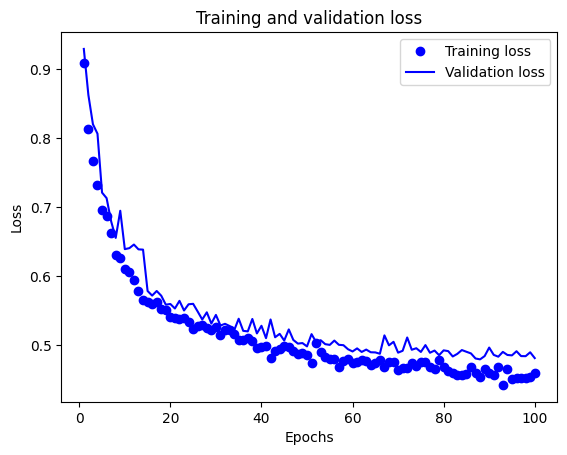

<Figure size 640x480 with 0 Axes>

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()


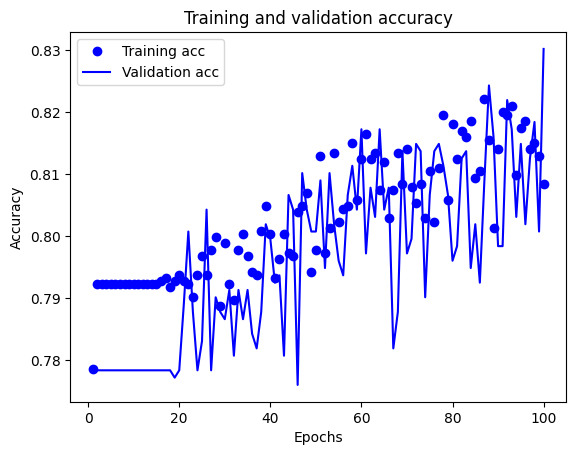

In [75]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

89/89 [==============================] - 0s 3ms/step


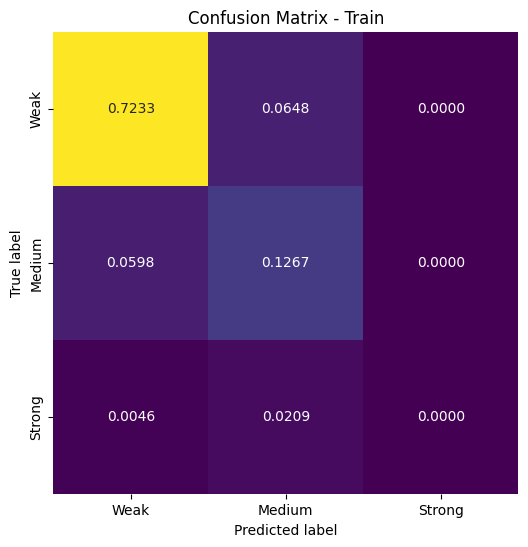

In [76]:
y_pred_train= history.model.predict(X_cnn_train)
y_pred_train = np.argmax(y_pred_train, axis=1)
y_cnn_train_cfm = np.argmax(y_cnn_train, axis=1)
cfm = confusion_matrix(y_cnn_train_cfm, y_pred_train, normalize="all")

cfm_df = pd.DataFrame(cfm, index=["Weak", "Medium", "Strong"], columns=["Weak", "Medium", "Strong"])

plt.figure(figsize=(6, 6))

sns.heatmap(cfm_df, annot=True, cmap='viridis', fmt='.4f', cbar=False, linewidths=0, linecolor=None)

plt.title("Confusion Matrix - Train")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

10/10 [==============================] - 0s 4ms/step


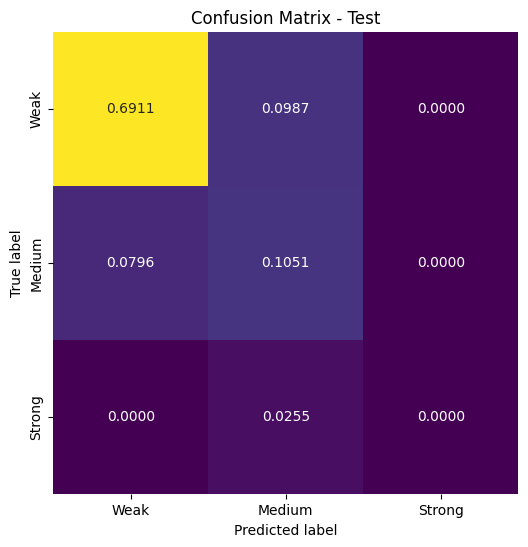

In [77]:
y_pred_test= history.model.predict(X_cnn_test)
y_pred_test = np.argmax(y_pred_test, axis=1)
y_cnn_test_cfm = np.argmax(y_cnn_test, axis=1)
cfm = confusion_matrix(y_cnn_test_cfm, y_pred_test, normalize="all")

cfm_df = pd.DataFrame(cfm, index=["Weak", "Medium", "Strong"], columns=["Weak", "Medium", "Strong"])

plt.figure(figsize=(6, 6))

sns.heatmap(cfm_df, annot=True, cmap='viridis', fmt='.4f', cbar=False, linewidths=0, linecolor=None)

plt.title("Confusion Matrix - Test")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()